In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(100, 10)})
data = pd.read_csv("BATADAL_dataset03.csv")
dataA = pd.read_csv("BATADAL_dataset04.csv")

In [214]:
data["DATETIME"]= pd.to_datetime(data["DATETIME"])

data = data.set_index('DATETIME')

dataA["DATETIME"]= pd.to_datetime(dataA["DATETIME"])

dataA = dataA.set_index('DATETIME')

In [215]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday Name'] = data.index.weekday_name
data['Hour'] = data.index.hour

In [216]:
data.index

DatetimeIndex(['2014-06-01 00:00:00', '2014-06-01 01:00:00',
               '2014-06-01 02:00:00', '2014-06-01 03:00:00',
               '2014-06-01 04:00:00', '2014-06-01 05:00:00',
               '2014-06-01 06:00:00', '2014-06-01 07:00:00',
               '2014-06-01 08:00:00', '2014-06-01 09:00:00',
               ...
               '2015-05-01 15:00:00', '2015-05-01 16:00:00',
               '2015-05-01 17:00:00', '2015-05-01 18:00:00',
               '2015-05-01 19:00:00', '2015-05-01 20:00:00',
               '2015-05-01 21:00:00', '2015-05-01 22:00:00',
               '2015-05-01 23:00:00', '2015-06-01 00:00:00'],
              dtype='datetime64[ns]', name='DATETIME', length=8761, freq=None)

In [217]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['L_T1']
# Resample to weekly frequency, aggregating with mean
data_weekly_mean = data[data_columns].resample('W').mean()
data_weekly_mean.head(3)

# Compute the centered 7-day rolling mean
data_7d = data[data_columns].rolling(7, center=True).mean()
data_7d.head(10)

data_7d["L_T1"]

DATETIME
2014-06-01 00:00:00         NaN
2014-06-01 01:00:00         NaN
2014-06-01 02:00:00         NaN
2014-06-01 03:00:00    0.576643
2014-06-01 04:00:00    0.706746
                         ...   
2015-05-01 20:00:00    3.307113
2015-05-01 21:00:00    3.200535
2015-05-01 22:00:00         NaN
2015-05-01 23:00:00         NaN
2015-06-01 00:00:00         NaN
Name: L_T1, Length: 8761, dtype: float64

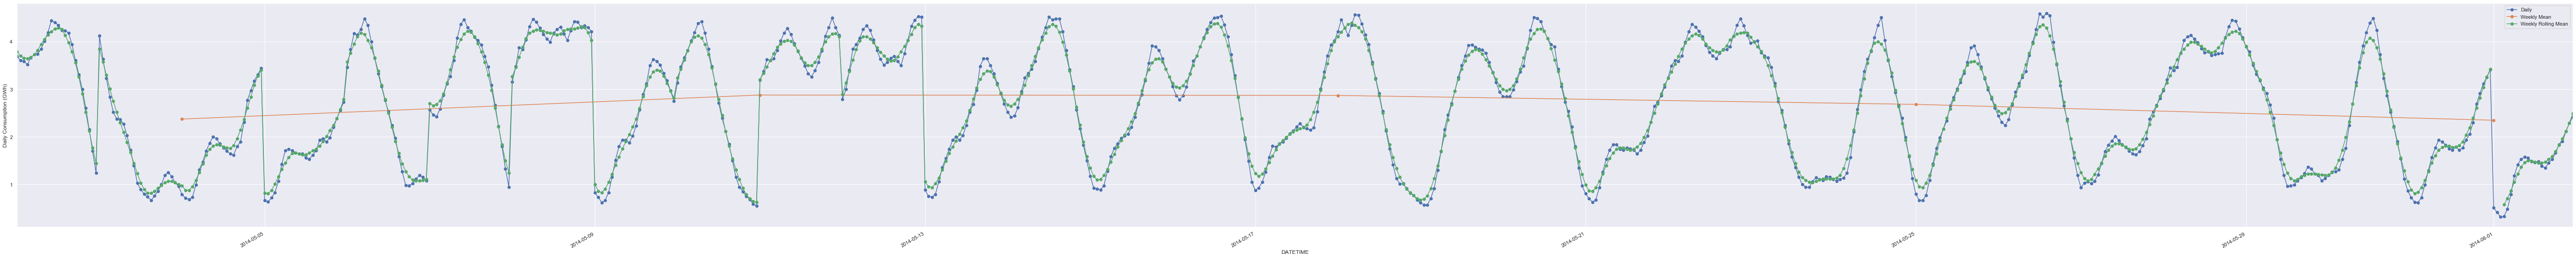

In [218]:
ax = data.loc['2014-05-01':'2014-06-01', 'L_T1'].plot(marker='o', linestyle='-',label="Daily")
ax.set_ylabel('Daily Consumption (GWh)');
ax = data_weekly_mean.loc['2014-05-01':'2014-06-01', 'L_T1'].plot(marker='o',linestyle='-',label="Weekly Mean")
ax = data_7d.loc['2014-05-01':'2014-06-01', "L_T1"].plot(marker='o',linestyle='-',label="Weekly Rolling Mean")
ax.legend();

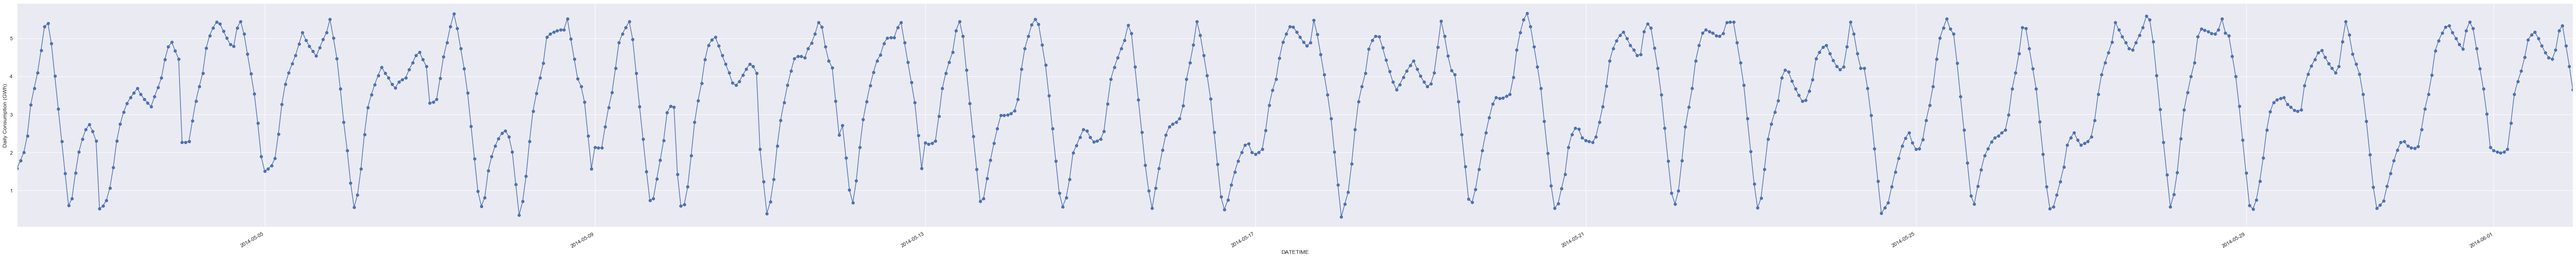

In [219]:
ax = data.loc['2014-05-01':'2014-06-01', 'L_T2'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

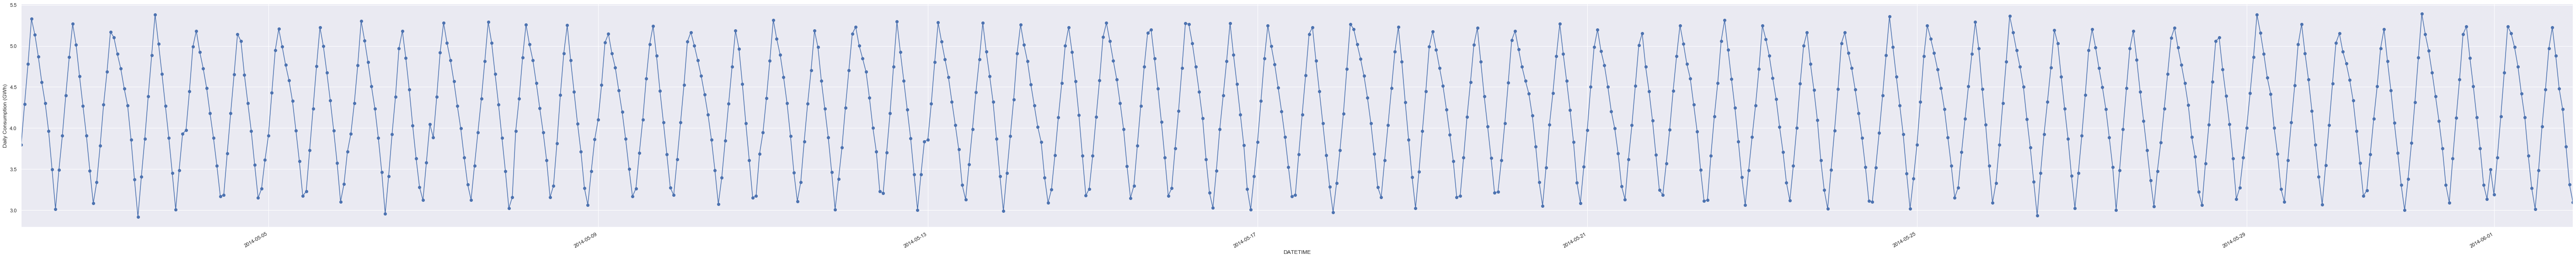

In [220]:
ax = data.loc['2014-05-01':'2014-06-01', 'L_T3'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

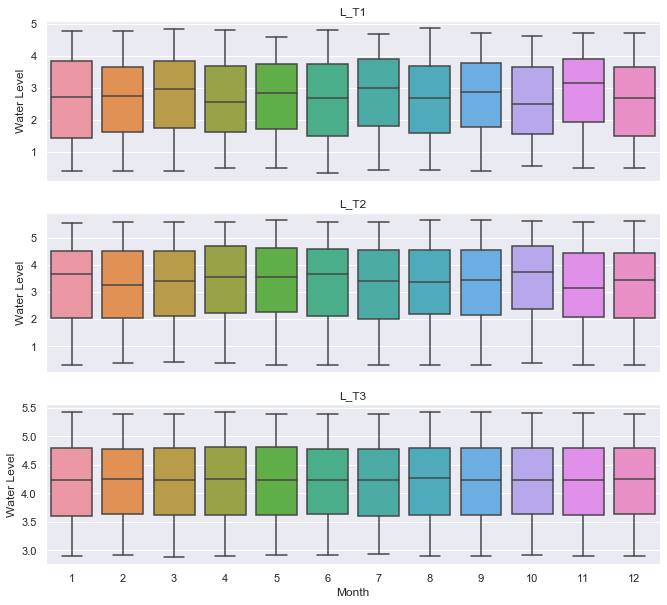

In [221]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['L_T1', 'L_T2', 'L_T3'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax)
    ax.set_ylabel('Water Level')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

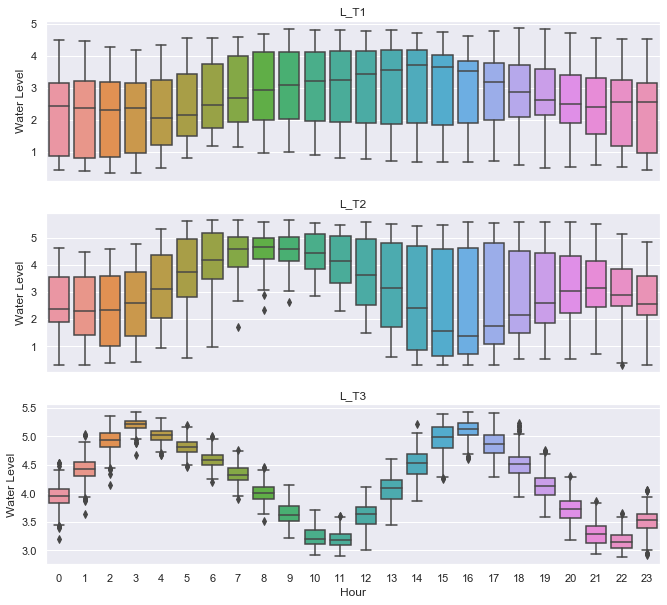

In [222]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['L_T1', 'L_T2', 'L_T3'], axes):
    sns.boxplot(data=data, x='Hour', y=name, ax=ax)
    ax.set_ylabel('Water Level')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

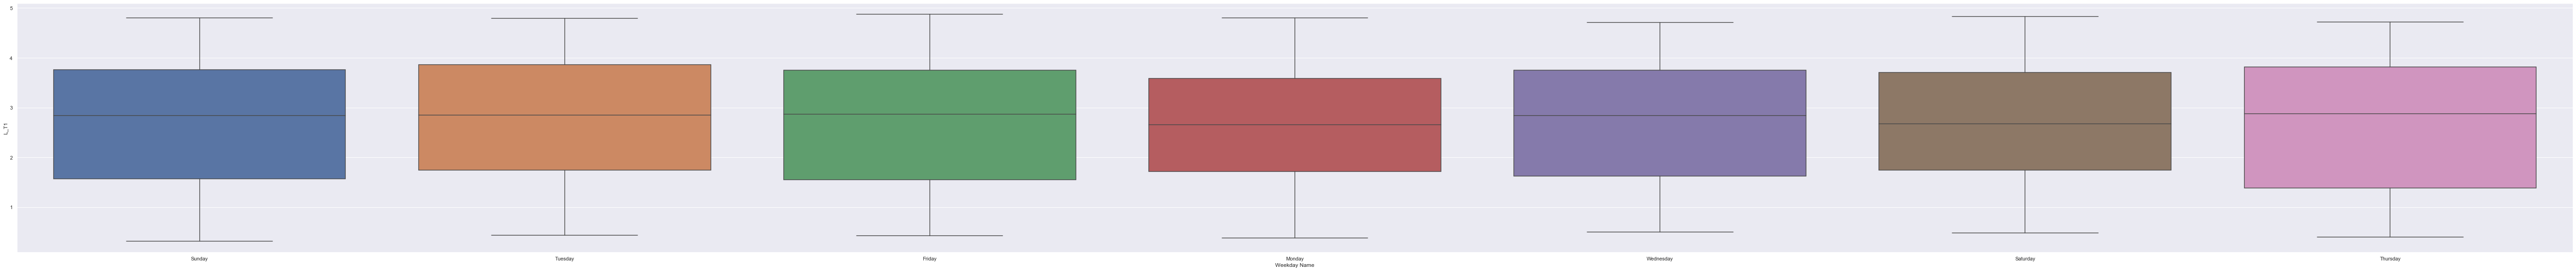

In [223]:
sns.boxplot(data=data, x='Weekday Name', y='L_T1');

In [224]:
df=data.drop(columns=[
    #'S_PU1', 'S_PU2', 'S_PU3', 'S_PU4',
    #   'S_PU5', 'S_PU6', 'S_PU7', 'S_PU8',
    #   'S_PU9', 'S_PU10','S_PU11','S_V2',
    'ATT_FLAG','Year',
       'Month', 'Weekday Name', 'Hour'])

In [225]:
dfA=dataA.drop(columns=[
    #'S_PU1', 'S_PU2', 'S_PU3', 'S_PU4',
    #   'S_PU5', 'S_PU6', 'S_PU7', 'S_PU8',
    #   'S_PU9', 'S_PU10','S_PU11','S_V2',
    ' ATT_FLAG'])

In [226]:
df=df-df.mean(axis=0)
dfA=dfA-dfA.mean(axis=0)

In [227]:
from sklearn.decomposition import PCA
pca = PCA(n_components=df.shape[1])
pca.fit(df)
principalComponents = pca.transform(df)
for i in range(df.shape[1]):
    principalComponents[:,i]=principalComponents[:,i]/np.linalg.norm(principalComponents[:,i])

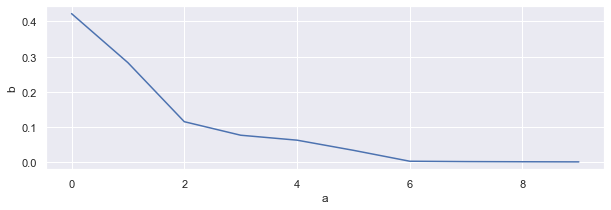

In [228]:
dff=pd.DataFrame(columns=["a","b"])
dff["a"] = range(10)#pca.explained_variance_.shape[0])
dff["b"]=pca.explained_variance_ratio_.ravel()[:10]
sns.set(rc={'figure.figsize':(10, 3)})
sns.lineplot(x="a", y="b", data=dff)

In [229]:
std=principalComponents.std(axis=0)
out=[]
for i in range(principalComponents.shape[1]):
    for x in principalComponents[:,i]:
        if x>3*std[i]:
            out.append(i)
(out[0])            

4

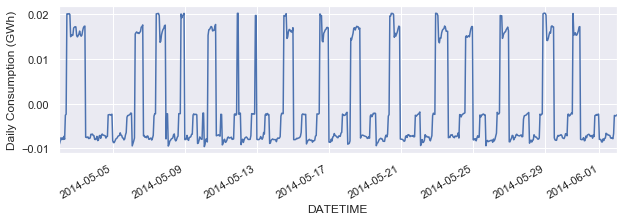

In [230]:
pCdf = pd.DataFrame(principalComponents,columns=df.columns,index=df.index)


ax = pCdf.loc['2014-05-01':'2014-06-01', df.columns[0]].plot(linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

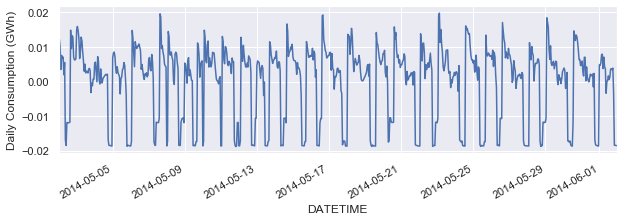

In [231]:
ax = pCdf.loc['2014-05-01':'2014-06-01', df.columns[1]].plot(linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

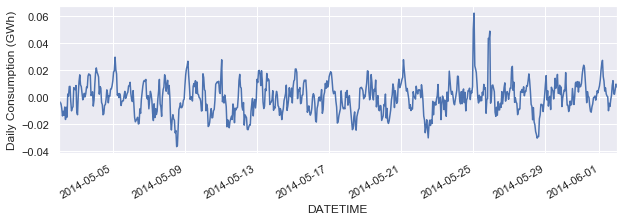

In [232]:
ax = pCdf.loc['2014-05-01':'2014-06-01', df.columns[8]].plot(linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

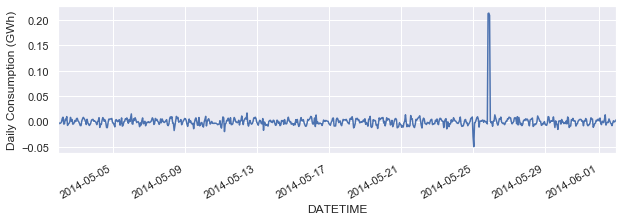

In [233]:
ax = pCdf.loc['2014-05-01':'2014-06-01', df.columns[9]].plot(linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

In [250]:
comp = pca.components_
P=comp.T[:,:4]
C = np.dot(P,P.T)
C_=(np.eye(C.shape[0],C.shape[1])-C)

In [251]:
#Cleaning the training set 1. 
"""y_bars=[]
for i in df.values:
    y_bars.append(np.dot(C_,i))
booly = []
for i in y_bars:
    if np.linalg.norm(i)**2>=crucy:
        booly.append(1)
    else:
        booly.append(0)
dropindex=[]
for i in range(len(booly)):
    if booly[i]>0:
        dropindex.append(i) 
index=list(set(range(len(booly)))-set(dropindex))        
df=df.iloc[index]
"""


'y_bars=[]\nfor i in df.values:\n    y_bars.append(np.dot(C_,i))\nbooly = []\nfor i in y_bars:\n    if np.linalg.norm(i)**2>=crucy:\n        booly.append(1)\n    else:\n        booly.append(0)\ndropindex=[]\nfor i in range(len(booly)):\n    if booly[i]>0:\n        dropindex.append(i) \nindex=list(set(range(len(booly)))-set(dropindex))        \ndf=df.iloc[index]\n'

In [252]:
#each row now will be 
y_hat = np.dot(C,df.values[0]) #normal space
y_bar = np.dot(C_,df.values[0]) #anamolous space

In [253]:
np.linalg.norm(y_hat)**2,np.linalg.norm(y_bar)**2

(2284.6238572285924, 159.97201036052704)

In [265]:
alpha1=pca.explained_variance_[4:].sum()
alpha2=((pca.explained_variance_[4:])**2).sum()
alpha3=((pca.explained_variance_[4:])**3).sum()

In [266]:
h0= 1- (2*alpha1*alpha3)/(3*alpha2**2)

In [267]:
crucy = alpha1*((.999*(2*alpha2*h0**2)**(1/2)/alpha1) + 1 + (alpha2*h0*(h0-1))/alpha2**2)**(1/h0)

In [268]:
crucy

1146.5679681600102

In [269]:
y_barsA=[]
for i in dfA.values:
    y_barsA.append(np.dot(C_,i))      

In [271]:
boolyA = []

for i in y_barsA:
    if np.linalg.norm(i)**2>=crucy:
        boolyA.append(1)
    else:
        boolyA.append(0)        

In [272]:
A=[]
for i in range(len(dataA[" ATT_FLAG"].values)):
    if dataA[" ATT_FLAG"].values[i]>0:
        A.append(i)

In [273]:
dropindexA=[]
for i in range(len(boolyA)):
    if boolyA[i]>0:
        dropindexA.append(i)

In [274]:
#Number of samples in training set 2. Number of predicted attacks, number of known attacks.
(len(boolyA),sum(boolyA),len(A))

(4177, 363, 219)

In [275]:
#Confusion Matrix to study performance= 
TP = len(A)-len(set(A)-set(dropindexA))
FP = len(dropindexA)-TP
FN = len(A)-TP
TN = len(boolyA)- TP - FP - FN
TP,FP,FN,TN

(99, 264, 120, 3694)

In [277]:
y_barsAC=[]
for i in dfA.values:
    y_barsAC.append(np.dot(C,i))

In [280]:
y_barsA=np.array(y_barsA)
y_barsAC=np.array(y_barsAC)

In [282]:
y=y_barsA+y_barsAC

In [283]:
square_normsY= [np.linalg.norm(x)**2 for x in y]

In [286]:
square_normsY_ = [np.linalg.norm(x)**2 for x in y_barsA]

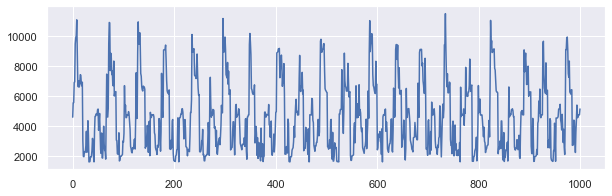

In [289]:
plt.plot(square_normsY[:1000])

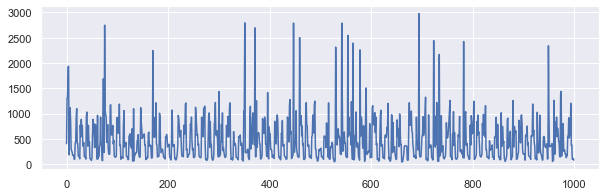

In [290]:
plt.plot(square_normsY_[:1000])